<a href="https://colab.research.google.com/github/abhinav123pandey/Machine_Learning_Lab_Work/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from sklearn.datasets import load_digits

data=load_digits()

print(data)
print(" ")
print(data.target.shape)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

0


array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -5.90658968,
         -2.74359339,  -0.41983691],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.29176445,
          2.13402725,   5.83935668],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   1.67969049,
          4.27600306,  -6.72848489],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -2.66524033,
          5.84545154,   3.74117286],
       [ -4.87210009, -12.42395362,  10.17086635, ..., -10.74707944,
         -2.40954321,   2.31516865],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -0.79590319,
         -0.20154072,  -0.73752555]])

<Figure size 640x480 with 0 Axes>

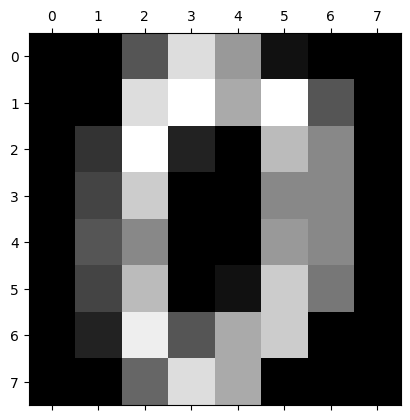

In [11]:
digit_0 = data.data[0].reshape(8, 8)
target_0 = data.target[0]


from matplotlib import pyplot as plt

%matplotlib inline

plt.gray()

plt.matshow(digit_0);

print(target_0)

In [13]:
import pandas as pd
X = pd.DataFrame(data.data)
Y = pd.DataFrame(data.target)

X.head()
Y.head()

from sklearn.decomposition import PCA
pca = PCA(0.85)
pca.fit_transform(X)
X_pca = pca.fit_transform(X)
print(X_pca)

[[ -1.25946645 -21.27488348   9.46305462 ...  -5.90658968  -2.74359339
   -0.41983691]
 [  7.9576113   20.76869896  -4.43950604 ...   2.29176445   2.13402725
    5.83935668]
 [  6.99192297   9.95598641  -2.95855808 ...   1.67969049   4.27600306
   -6.72848489]
 ...
 [ 10.8012837    6.96025223  -5.59955453 ...  -2.66524033   5.84545154
    3.74117286]
 [ -4.87210009 -12.42395362  10.17086635 ... -10.74707944  -2.40954321
    2.31516865]
 [ -0.34438963  -6.36554919 -10.77370849 ...  -0.79590319  -0.20154072
   -0.73752555]]


In [14]:
print(X_pca.shape)


(1797, 17)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y.values.ravel(), test_size=0.2, random_state=42)


# PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Logistic Regression
model = LogisticRegression(max_iter=1000) # Increased max_iter to address convergence warning
model.fit(X_train_pca, y_train)

# Accuracy Score
accuracy = model.score(X_test_pca, y_test)
print("Accuracy Score:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, model.predict(X_test_pca))
print("Confusion Matrix:\n",conf_matrix)



Accuracy Score: 0.8833333333333333
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 23  1  0  0  0  0  0  2  2]
 [ 0  2 31  0  0  0  0  0  0  0]
 [ 0  0  2 30  0  0  0  0  1  1]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 41  1  0  0  5]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 32  0  2]
 [ 0  5  0  2  0  1  0  0 20  2]
 [ 0  1  0  6  1  0  0  1  3 28]]
